In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.applications import DenseNet121
from keras.callbacks import EarlyStopping

In [2]:
image_size = (224, 224)
batch_size = 32
num_classes = 38  
validation_split = 0.2
train_dir = "train"  
test_dir = "test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)


Found 17482 images belonging to 38 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 17572 images belonging to 38 classes.


In [4]:
# Load pre-trained DenseNet121 model without the top (fully connected) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
from keras.layers import GlobalAveragePooling2D
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
opt = Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [12]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=40,
        validation_data=test_generator,
        validation_steps=len(test_generator),
        callbacks=[early_stopping]
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise

Epoch 1/40


c:\Users\hp\Downloads\leafdataset\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 3854s 7s/step - accuracy: 0.5038 - loss: 1.8494 - val_accuracy: 0.8749 - val_loss: 0.4159
Epoch 2/40


c:\Users\hp\Downloads\leafdataset\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 3280s 6s/step - accuracy: 0.8441 - loss: 0.4832 - val_accuracy: 0.9004 - val_loss: 0.3042
Epoch 4/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 2901s 5s/step - accuracy: 0.8793 - loss: 0.3670 - val_accuracy: 0.9204 - val_loss: 0.2488
Epoch 6/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 2815s 5s/step - accuracy: 0.8947 - loss: 0.3234 - val_accuracy: 0.9306 - val_loss: 0.2139


In [14]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=test_generator,
        validation_steps=len(test_generator),
        callbacks=[early_stopping]
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1878s 3s/step - accuracy: 0.8321 - loss: 0.5240 - val_accuracy: 0.9106 - val_loss: 0.2843
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1329s 2s/step - accuracy: 0.8743 - loss: 0.3768 - val_accuracy: 0.9079 - val_loss: 0.2671
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1299s 2s/step - accuracy: 0.8955 - loss: 0.3180 - val_accuracy: 0.9248 - val_loss: 0.2290


In [15]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=test_generator,
        validation_steps=len(test_generator),
        callbacks=[early_stopping]
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1797s 3s/step - accuracy: 0.8719 - loss: 0.3872 - val_accuracy: 0.9183 - val_loss: 0.2471
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1721s 3s/step - accuracy: 0.8944 - loss: 0.3219 - val_accuracy: 0.9223 - val_loss: 0.2374
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1627s 3s/step - accuracy: 0.9046 - loss: 0.2885 - val_accuracy: 0.9120 - val_loss: 0.2538


In [19]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_data=test_generator,
        validation_steps=len(test_generator),
        callbacks=[early_stopping]
    )
except Exception as e:
    print("An error occurred during training:", e)
    raise

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 1680s 3s/step - accuracy: 0.8918 - loss: 0.3233 - val_accuracy: 0.9145 - val_loss: 0.2523
Epoch 2/5


c:\Users\hp\Downloads\leafdataset\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 1639s 3s/step - accuracy: 0.9041 - loss: 0.2849 - val_accuracy: 0.9293 - val_loss: 0.2079
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 1524s 3s/step - accuracy: 0.9130 - loss: 0.2557 - val_accuracy: 0.9221 - val_loss: 0.2225


In [20]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
# Print the accuracy
print("Test Accuracy:", accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 664s 1s/step - accuracy: 0.9496 - loss: 0.1462
Test Accuracy: 0.9145231246948242


In [18]:
print("Test Accuracy for DenseNet :", accuracy*100)

Test Accuracy for DenseNet : 91.83359742164612


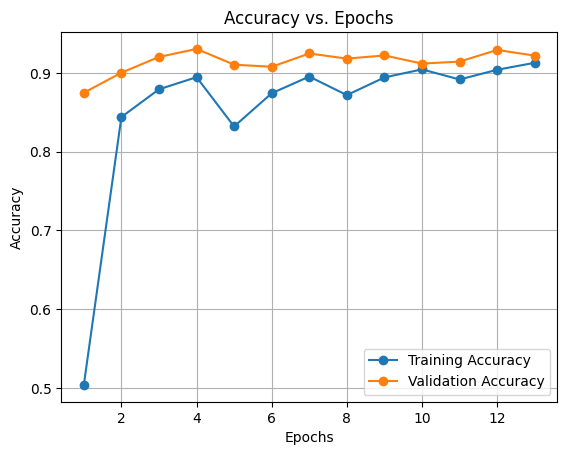

In [22]:
import matplotlib.pyplot as plt

# Define the epoch data
epoch_data = [
    
    {'accuracy': 0.5038, 'loss': 1.8494, 'val_accuracy': 0.8749, 'val_loss': 0.4159},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8441, 'loss': 0.4832, 'val_accuracy': 0.9004, 'val_loss': 0.3042},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8793, 'loss': 0.3670, 'val_accuracy': 0.9204, 'val_loss': 0.2488},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8947, 'loss': 0.3234, 'val_accuracy': 0.9306, 'val_loss': 0.2139},
    {'accuracy': 0.8321, 'loss': 0.5240, 'val_accuracy': 0.9106, 'val_loss': 0.2843},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8743, 'loss': 0.3768, 'val_accuracy': 0.9079, 'val_loss': 0.2671},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8955, 'loss': 0.3180, 'val_accuracy': 0.9248, 'val_loss': 0.2290},
    {'accuracy': 0.8719, 'loss': 0.3872, 'val_accuracy': 0.9183, 'val_loss': 0.2471},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.8944, 'loss': 0.3219, 'val_accuracy': 0.9223, 'val_loss': 0.2374},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9046, 'loss': 0.2885, 'val_accuracy': 0.9120, 'val_loss': 0.2538},
    {'accuracy': 0.8918, 'loss': 0.3233, 'val_accuracy': 0.9145, 'val_loss': 0.2523},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9041, 'loss': 0.2849, 'val_accuracy': 0.9293, 'val_loss': 0.2079},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.9130, 'loss': 0.2557, 'val_accuracy': 0.9221, 'val_loss': 0.2225}
]
def plot_accuracy_from_epochs(epoch_data):
    training_accuracy = []
    validation_accuracy = []
    
    for epoch in epoch_data:
        training_acc = epoch['accuracy']
        val_acc = epoch['val_accuracy']
        
        if training_acc != 0.0 and val_acc != 0.0:
            training_accuracy.append(training_acc)
            validation_accuracy.append(val_acc)

    epochs = range(1, len(training_accuracy) + 1)

    plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
    plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')

    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_accuracy_from_epochs(epoch_data)

In [26]:

model_path = "saved_models/modeldensenet.keras"
model.save(model_path)
print("Model saved successfully at", model_path)


Model saved successfully at saved_models/modeldensenet.keras
